# Global Port Spillage Estimator

## The Data

This analysis uses data from the [IMF Portwatch Portal](https://portwatch.imf.org/):

- Spillover similulator at-risk capacity (metric tons) dataset:[Portwatch Spillover At-Risk Capacity Simulator Data Link](https://portwatch-imf-dataviz.hub.arcgis.com/datasets/568ee4b957b84481b2af1592f9ad22dd/about). 
- Spillover simulator at-risk-value (USD) dataset: [Portwatch Spillover At-Risk Value Simulator Data Link](https://portwatch.imf.org/datasets/4257aafcbff6453688ee72be7207bd37/about)

The Portwatch data draw upon a port-level geospatial layer describes the network of port-to-port connections given vessels movements between two respective ports. The network is based on a satellite-derived dataset of vessel movements of around 10,000 vessels between 2019 and 2020, from which a port-to-port transport network was constructed.

The spillover simulator estimates the amount of maritime capacity being at-risk of facing delays or disruptions due to port disruptions that affect outgoing vessel movements. These estimates are based on data as of *November 12, 2023*. The model assumes a linear relationship between the number of days of disruption and the impacts, measured in terms of lost metric tons (capacity) or USD (value)

Reference paper: [Verschuur, J., Koks, E.E. & Hall, J.W. Systemic risks from climate-related disruptions at ports. Nat. Clim. Chang. 13, 804–806 (2023).](https://doi.org/10.1038/s41558-023-01754-w)

## Methodology

### Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

### Part I: Estimating At-Risk Capacity of a Port Disruption (Metric Tons) by Country

#### Read in Downladed Dataset and Select Country of Interest

In [62]:
# Read the data from the downloaded file into a DataFrame
df = pd.read_csv('2023-11-12-spill-data.csv')

# Filter data to only select rows where "to_country" = "Yemen" (for example)
df_filtered = df[df['to_country'] == 'Yemen']

#### Filter Data for Top Ten Impacted Countries (Summation of All Port Data for Each Country)

In [63]:
# Identify the top ten "from_country" with greatest "daily_capacity_at_risk"
top_ten_countries = df_filtered.groupby('from_country')['daily_capacity_at_risk'].sum().nlargest(10)

# Create a new table with 90-day indicator (using standard numbers in lieu of scientific notation)
new_table = top_ten_countries.reset_index()
new_table['daily_capacity_at_risk_90_days_disruption'] = (new_table['daily_capacity_at_risk'] * 90).apply(lambda x: '{:.0f}'.format(x))

#### Generate Bar Chart
##### Aggregated by Country, Export Capacity at Risk during a 90-Day Disruption of Any Port in a Selected Country (Metric Tons)

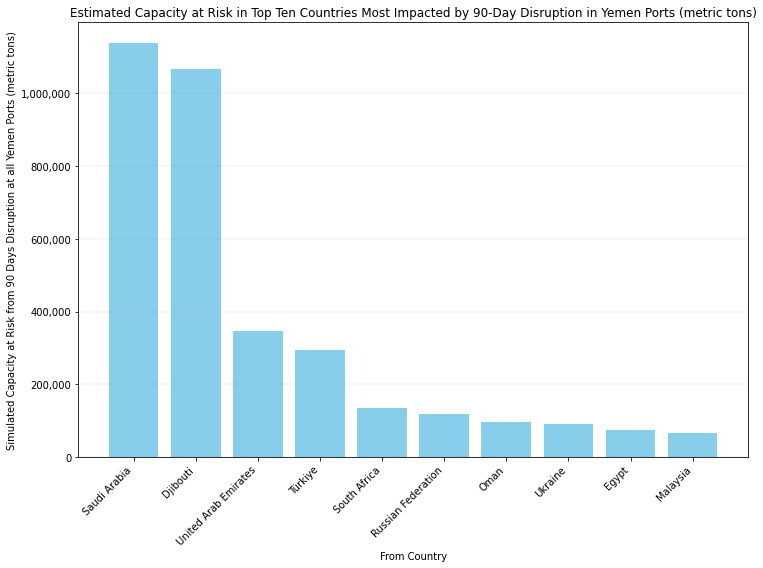

,from_country,daily_capacity_at_risk,daily_capacity_at_risk_90_days_disruption
0,Saudi Arabia,12643.487558,1137914
1,Djibouti,11860.796300,1067472
2,United Arab Emirates,3855.990247,347039
3,Türkiye,3282.348785,295411
4,South Africa,1509.575073,135862
5,Russian Federation,1303.949299,117355
6,Oman,1076.202858,96858
7,Ukraine,998.247991,89842
8,Egypt,837.215334,75349
9,Malaysia,730.501202,65745


In [60]:
# Sort 'daily_capacity_at_risk_90_days_disruption' in descending order
sorted_table = new_table.copy()
sorted_table['daily_capacity_at_risk_90_days_disruption'] = sorted_table['daily_capacity_at_risk_90_days_disruption'].astype(int)
sorted_table = sorted_table.sort_values(by='daily_capacity_at_risk_90_days_disruption', ascending=False)

# Create vertical bar chart with adjusted y-axis labels (without scientific notation)
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_table['from_country'], sorted_table['daily_capacity_at_risk_90_days_disruption'], color='skyblue')
plt.ylabel('Simulated Capacity at Risk from 90 Days Disruption at all Yemen Ports (metric tons)')
plt.xlabel('From Country')
plt.title('Estimated Capacity at Risk in Top Ten Countries Most Impacted by 90-Day Disruption in Yemen Ports (metric tons)')
plt.xticks(rotation=45, ha="right")

# Adjust y-axis labels to display standard numbers
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add gray grid lines
plt.grid(axis='y', color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.show()

# Show accompanying table for clarity
sorted_table


### Part II: Estimating Aggregated At-Risk Export Value by Country from Any Port Disruption in a Selected Country (USD)

#### Read in Downladed Dataset and Select Country of Interest

In [61]:
# Read the data from the downloaded file into a DataFrame
data_df = pd.read_csv('2023-11-12-spill-country-data.csv')

# Filter data to only select rows where "to_country" = "Yemen" (for example)
country_data = data_df[data_df['to_country'] == 'Yemen']

#### Filter Data for Top Ten Impacted Countries (Summation of All Port Data for Each Country)

In [65]:
# Create a new table, summing the daily export and import values at risk for all from_portid in each from_country
grouped_data = country_data.groupby(['from_country', 'industry']).agg(
    daily_export_value_at_risk=('daily_export_value_at_risk', 'sum'),
    daily_import_value_at_risk=('daily_import_value_at_risk', 'sum')
).reset_index()

# Identify the top ten countries with the greatest daily_export_value_at_risk
top_ten_exporters = grouped_data.groupby('from_country')['daily_export_value_at_risk'].sum().nlargest(10).reset_index()

# Create a new table for these top ten countries, including a new column that multiplies the export value by 90 days (or other time period -- the relatiobship is linear)
top_ten_exporters['at_risk_daily_export_value_90x'] = top_ten_exporters['daily_export_value_at_risk'] * 90

#### Generate Bar Chart
##### Aggregated by Country, Export Value at Risk during a 90-Day Disruption of Any Port in a Selected Country (USD)

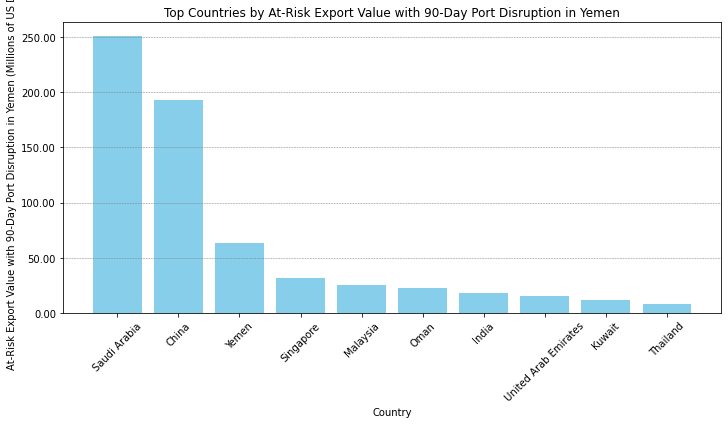

,from_country,daily_export_value_at_risk,at_risk_daily_export_value_90x
0,Saudi Arabia,2.785300e+06,2.506770e+08
1,China,2.147029e+06,1.932326e+08
2,Yemen,7.086035e+05,6.377432e+07
3,Singapore,3.530400e+05,3.177360e+07
4,Malaysia,2.854227e+05,2.568804e+07
5,Oman,2.486865e+05,2.238179e+07
6,India,1.981304e+05,1.783173e+07
7,United Arab Emirates,1.754435e+05,1.578992e+07
8,Kuwait,1.293204e+05,1.163884e+07
9,Thailand,9.406671e+04,8.466004e+06


In [66]:
# Create bar chart with y-axis showing "millions" and gray grid lines
plt.figure(figsize=(10, 6))
plt.bar(top_ten_exporters['from_country'], top_ten_exporters['at_risk_daily_export_value_90x'] / 1e6, color='skyblue')
plt.title('Top Countries by At-Risk Export Value with 90-Day Port Disruption in Yemen')
plt.xlabel('Country')
plt.ylabel('At-Risk Export Value with 90-Day Port Disruption in Yemen (Millions of US Dollars')
plt.xticks(rotation=45)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Adjust the y-axis labels to reflect the new scale in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(x)))

# Display the adjusted plot
plt.show()

# Show the new table for top ten countries
top_ten_exporters
